In [25]:
"""
M4 DATASET

download manualy from kaggle and unpack
hourly data contains 245 timeseries with 960 datapoint and
260 timeseries with 169 nans at the end --> 700 datapoints


we load hourly train and test data for m4
- train is shortened to 700 to remove NANs
- some timeseries are removed for electricity prediction to 348 / training for electricity
- test does not contain NANs
- test timeseries are tropped to fit the same 348 model
- TODO maybe still need to transpose
"""
import pandas as pd
kaggle_m4_link = "https://www.kaggle.com/datasets/yogesh94/m4-forecasting-competition-dataset"

m4_hourly_train = pd.read_csv("/home/ben_ten/ben/MA/datasets/m4/Hourly-train.csv")
m4_hourly_test = pd.read_csv("/home/ben_ten/ben/MA/datasets/m4/Hourly-test.csv")

m4_hourly_no_nan_train = m4_hourly_train.iloc[:349, :701]
m4_hourly_no_nan_test = m4_hourly_test.iloc[:349, :]

In [26]:
"""
Electric grid system dataset
paper = file:///C:/Users/Benedikt/Desktop/Mein_Ordner/WI-INFO/Semester_6/MA/s41597-022-01455-7.pdf
- use Deep NN with minute input, this is too small
- only pre-normalized values, does not work for my research

"""

'\nElectric grid system dataset\npaper = file:///C:/Users/Benedikt/Desktop/Mein_Ordner/WI-INFO/Semester_6/MA/s41597-022-01455-7.pdf\n- use Deep NN with minute input, this is too small\n- only pre-normalized values, does not work for my research\n\n'

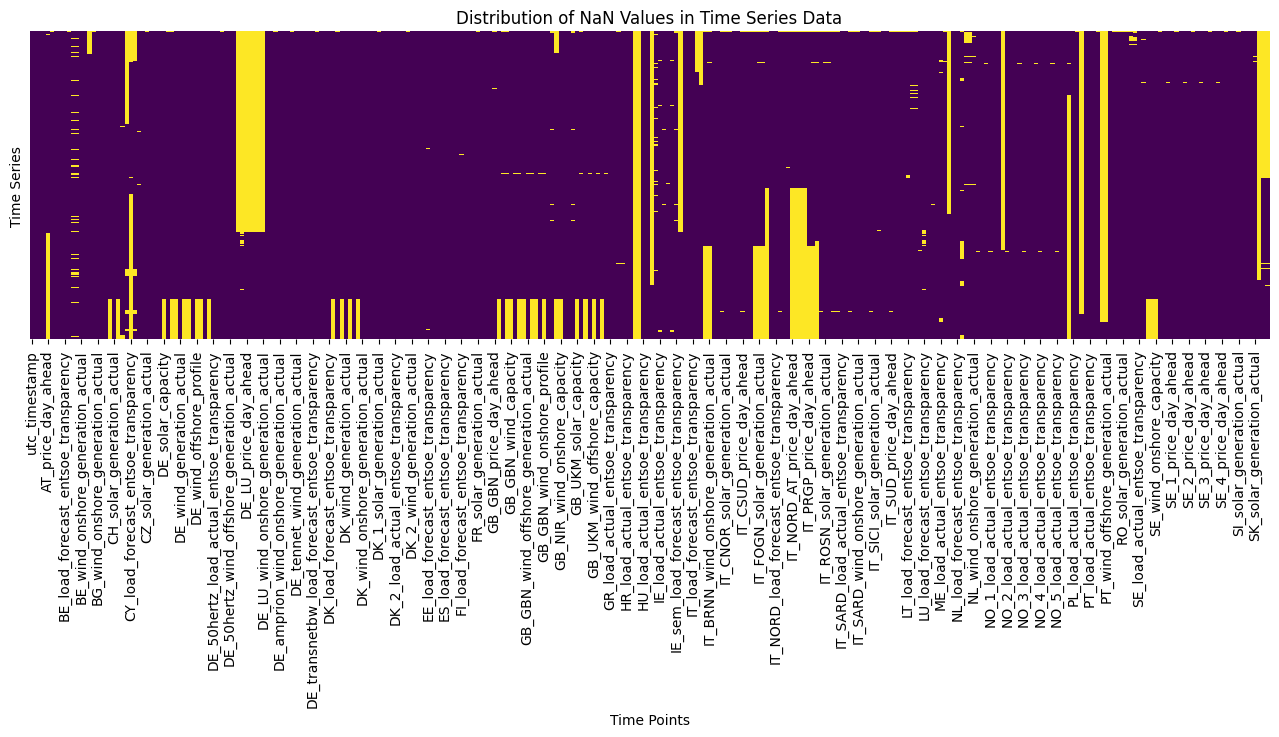

In [106]:
"""
europe electricity data
jupyterNB for explanation: https://nbviewer.org/github/Open-Power-System-Data/datapackage_timeseries/blob/2020-10-06/main.ipynb
- 50k entries
- 300 variates
- countries have different variates as some dont have wind/offshore or some NANs

"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("/home/ben_ten/ben/MA/datasets/electricity_europe/time_series_60min_singleindex.csv")
#df.describe()

def visualize_nans(df):
	# Create a heatmap to visualize the distribution of NaN values after removing some
	nan_counts = df.isna().sum()

	plt.figure(figsize=(16, 4))
	sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
	plt.xlabel('Time Points')
	plt.ylabel('Time Series')
	plt.title('Distribution of NaN Values in Time Series Data')
	plt.show()
visualize_nans(df)

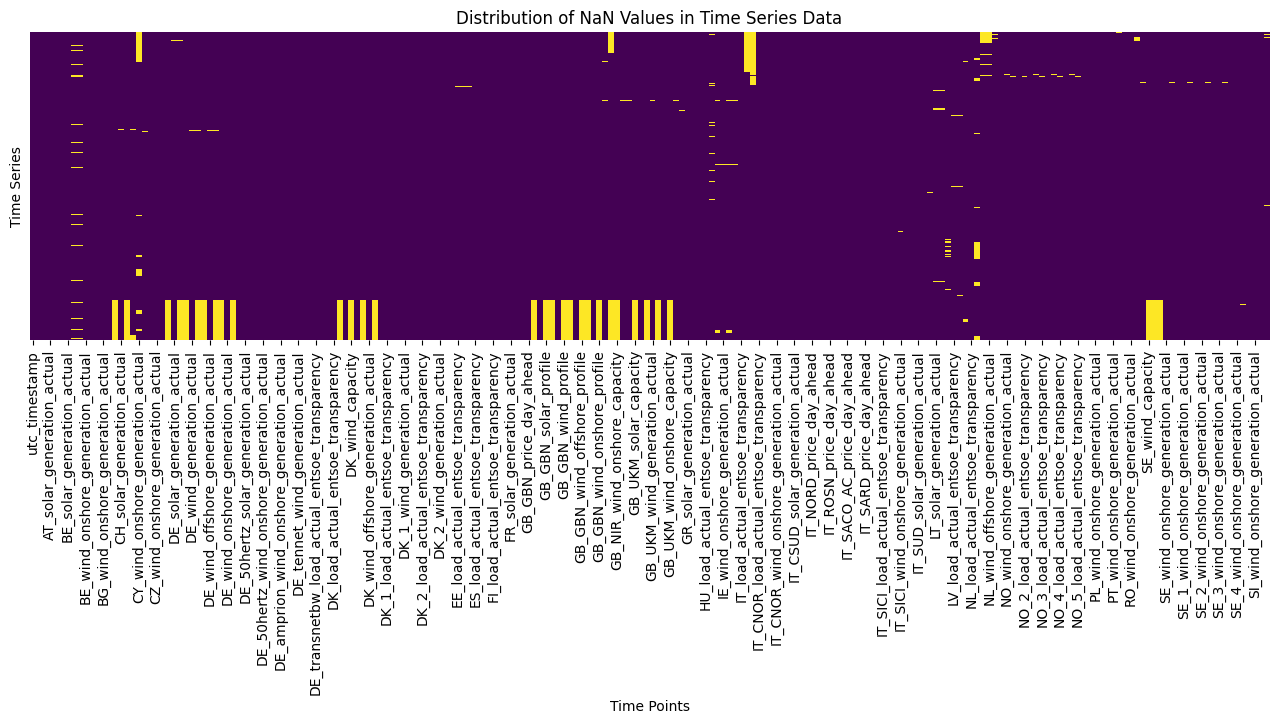

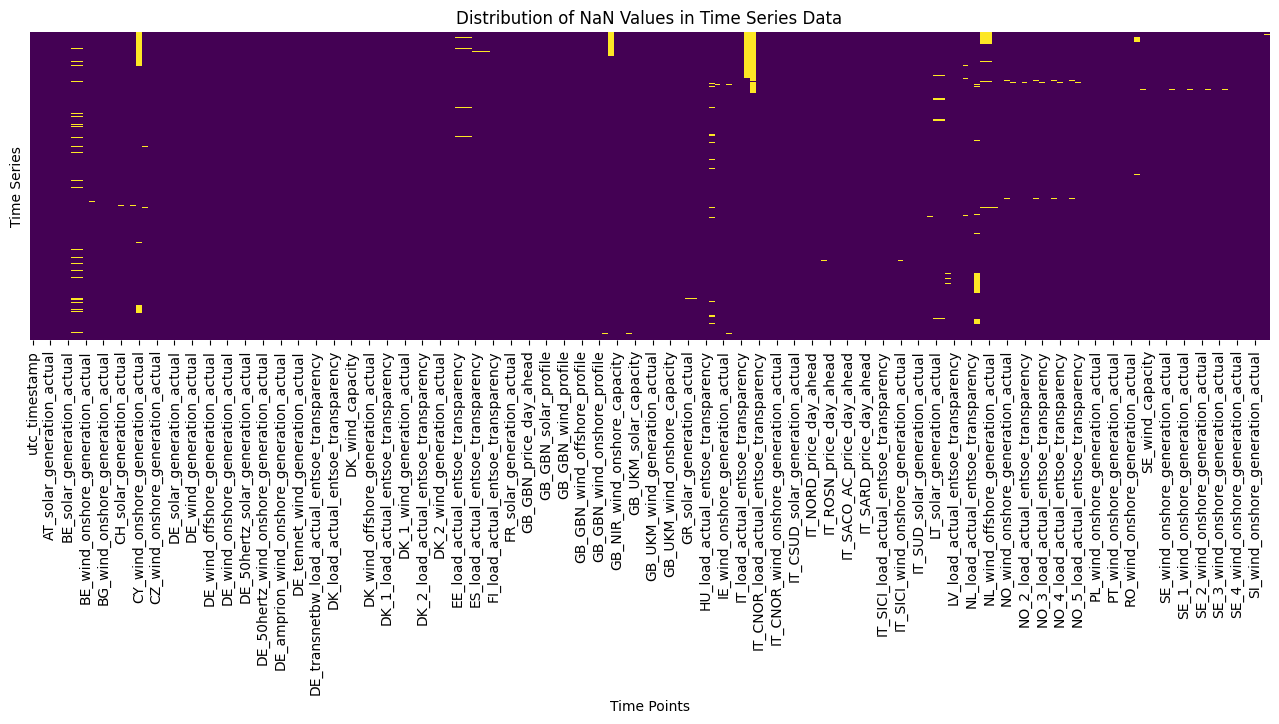

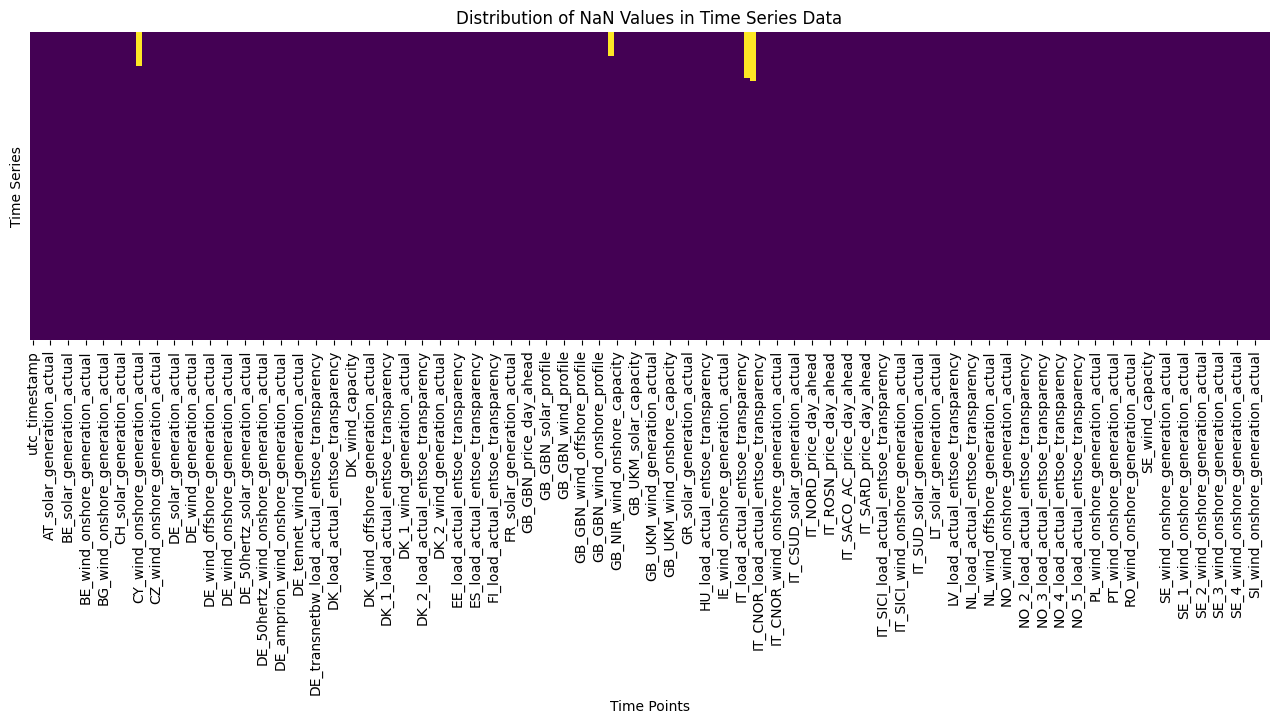

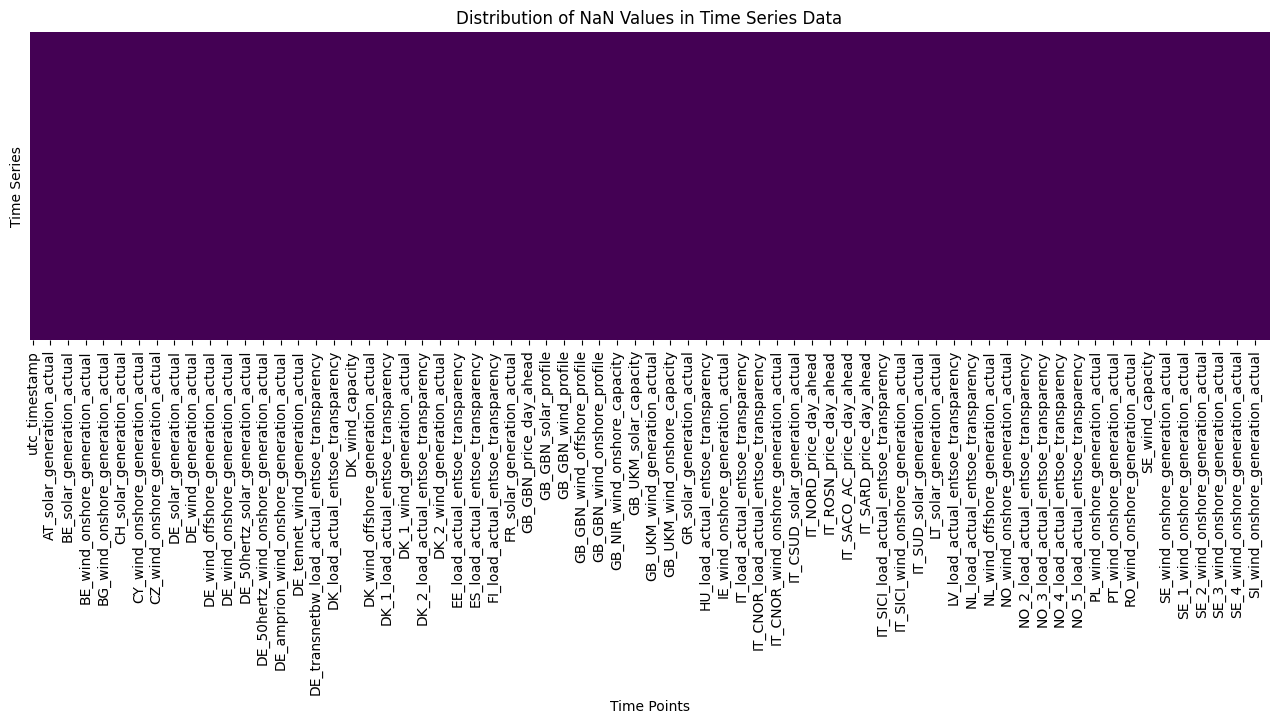

In [107]:
# drop forecast because its synthetic data
columns_to_delete = ['forecast']
df = df.drop([col for col in df.columns if any(partial_name in col for partial_name in columns_to_delete)], axis=1)

# drop columns with more than 40% missing values
threshold = 0.3 * len(df)
columns_to_drop = df.columns[df.isna().sum() > threshold]
df = df.drop(columns=columns_to_drop)
visualize_nans(df)

# drop rows with more than 10% NANs
threshold = 0.05 * len(df.columns)
df = df[df.isna().sum(axis=1) <= threshold]
visualize_nans(df)

# forward fill if previous values are present
df = df.fillna(method='ffill')
visualize_nans(df)

# values at the start are set to zero, no more NANs
df = df.fillna(0)

In [ ]:
# TODO reformat to ID/DATE/TARGET